In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ssbc import generate_rigorous_pac_report
import ssbc

In [59]:
p_class1 = 0.10
beta_params_class0 = (2, 5)
beta_params_class1 = (5, 3)

alpha_0 = 0.10
delta_0 = 0.10
alpha_1 = 0.10
delta_1 = 0.10

N_samples = 1000

In [60]:
sim = ssbc.BinaryClassifierSimulator(
    p_class1=p_class1, beta_params_class0=beta_params_class0, beta_params_class1=beta_params_class1
)

In [61]:
labels, probs = sim.generate(N_samples)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

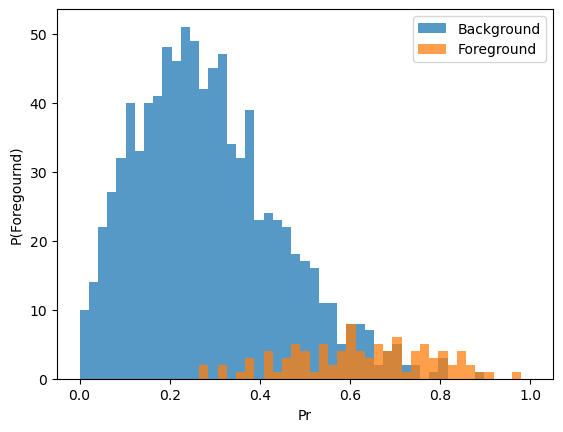

In [62]:
plt.hist(class_data[0]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.legend(["Background", "Foreground"])
plt.ylabel("P(Foregournd)")
plt.xlabel("Pr")
plt.savefig("tst.png")
plt.show()

In [63]:

# Generate report (now using SIMPLIFIED bounds)
report = generate_rigorous_pac_report(
    labels=labels,
    probs=probs,
    alpha_target=0.10,
    delta=0.10,
    test_size=N_samples,
    ci_level=0.95,
    use_union_bound=False,
    prediction_method="all",
    n_jobs=-1,
    verbose=True,
    loo_inflation_factor=2.5,
    use_loo_correction=True
    
)

Using provided LOO inflation factor: 2.500 (estimated from data: 1.002)
Using provided LOO inflation factor: 2.500 (estimated: 1.002) for comparison...
Using provided inflation factor for Hoeffding: 2.500
Using provided LOO inflation factor: 2.500 (estimated from data: 1.002)
Using provided LOO inflation factor: 2.500 (estimated: 1.002) for comparison...
Using provided inflation factor for Hoeffding: 2.500
Using provided LOO inflation factor: 2.500 (estimated from data: 2.000)
Using provided LOO inflation factor: 2.500 (estimated: 2.000) for comparison...
Using provided inflation factor for Hoeffding: 2.500
Using provided LOO inflation factor: 2.500 (estimated from data: 1.002)
Using provided LOO inflation factor: 2.500 (estimated: 1.002) for comparison...
Using provided inflation factor for Hoeffding: 2.500
Using provided LOO inflation factor: 2.500 (estimated from data: 1.002)
Using provided LOO inflation factor: 2.500 (estimated: 1.002) for comparison...
Using provided inflation fac

Using fixed thresholds: q̂₀=0.5194, q̂₁=0.6257
Running 100000 trials with test_size=1000...
Using all available CPU cores for parallel execution
PREDICTION INTERVAL VALIDATION RESULTS
PAC BOUNDS VALIDATION RESULTS

Trials: 100000
Test size: 1000
Thresholds: q̂₀=0.5194, q̂₁=0.6257

MARGINAL

SINGLETON:
  Empirical mean: 0.8165
  Expected (LOO): 0.8200
  Quantiles:      [2.5%: 0.792, 5%: 0.796, 25%: 0.808, 50%: 0.817, 75%: 0.825, 95%: 0.837, 97.5%: 0.840]
  Selected bounds: [0.7480, 0.8810]
  Coverage: 100.0% ✅
  Selected coverage: 100.0% ✅
  Method-specific validation:
    Analytical  : [0.7754, 0.8646] (width: 0.0892, coverage: 99.9%) ✅
    Exact       : [0.7480, 0.8810] (width: 0.1330, coverage: 100.0%) ✅
    Hoeffding   : [0.6992, 0.9408] (width: 0.2416, coverage: 100.0%) ✅

DOUBLET:
  Empirical mean: 0.1835
  Expected (LOO): 0.1800
  Quantiles:      [2.5%: 0.160, 5%: 0.163, 25%: 0.175, 50%: 0.183, 75%: 0.192, 95%: 0.204, 97.5%: 0.208]
  Selected bounds: [0.1190, 0.2520]
  Coverage: 

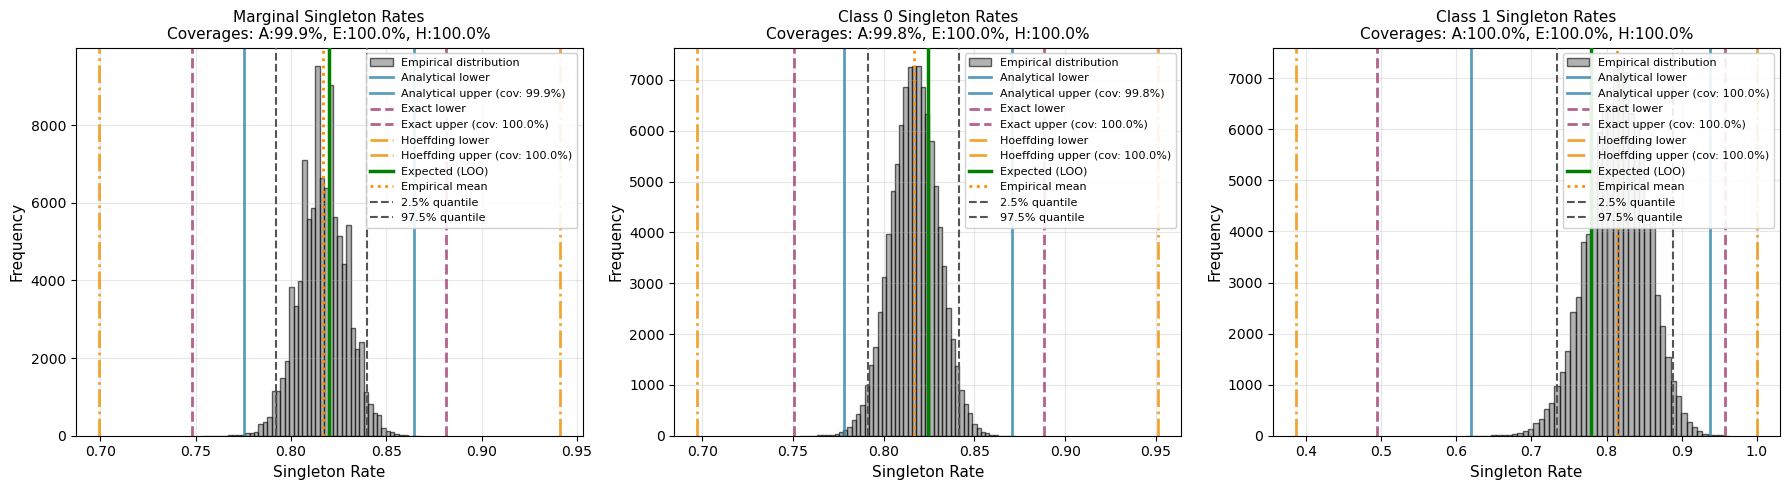

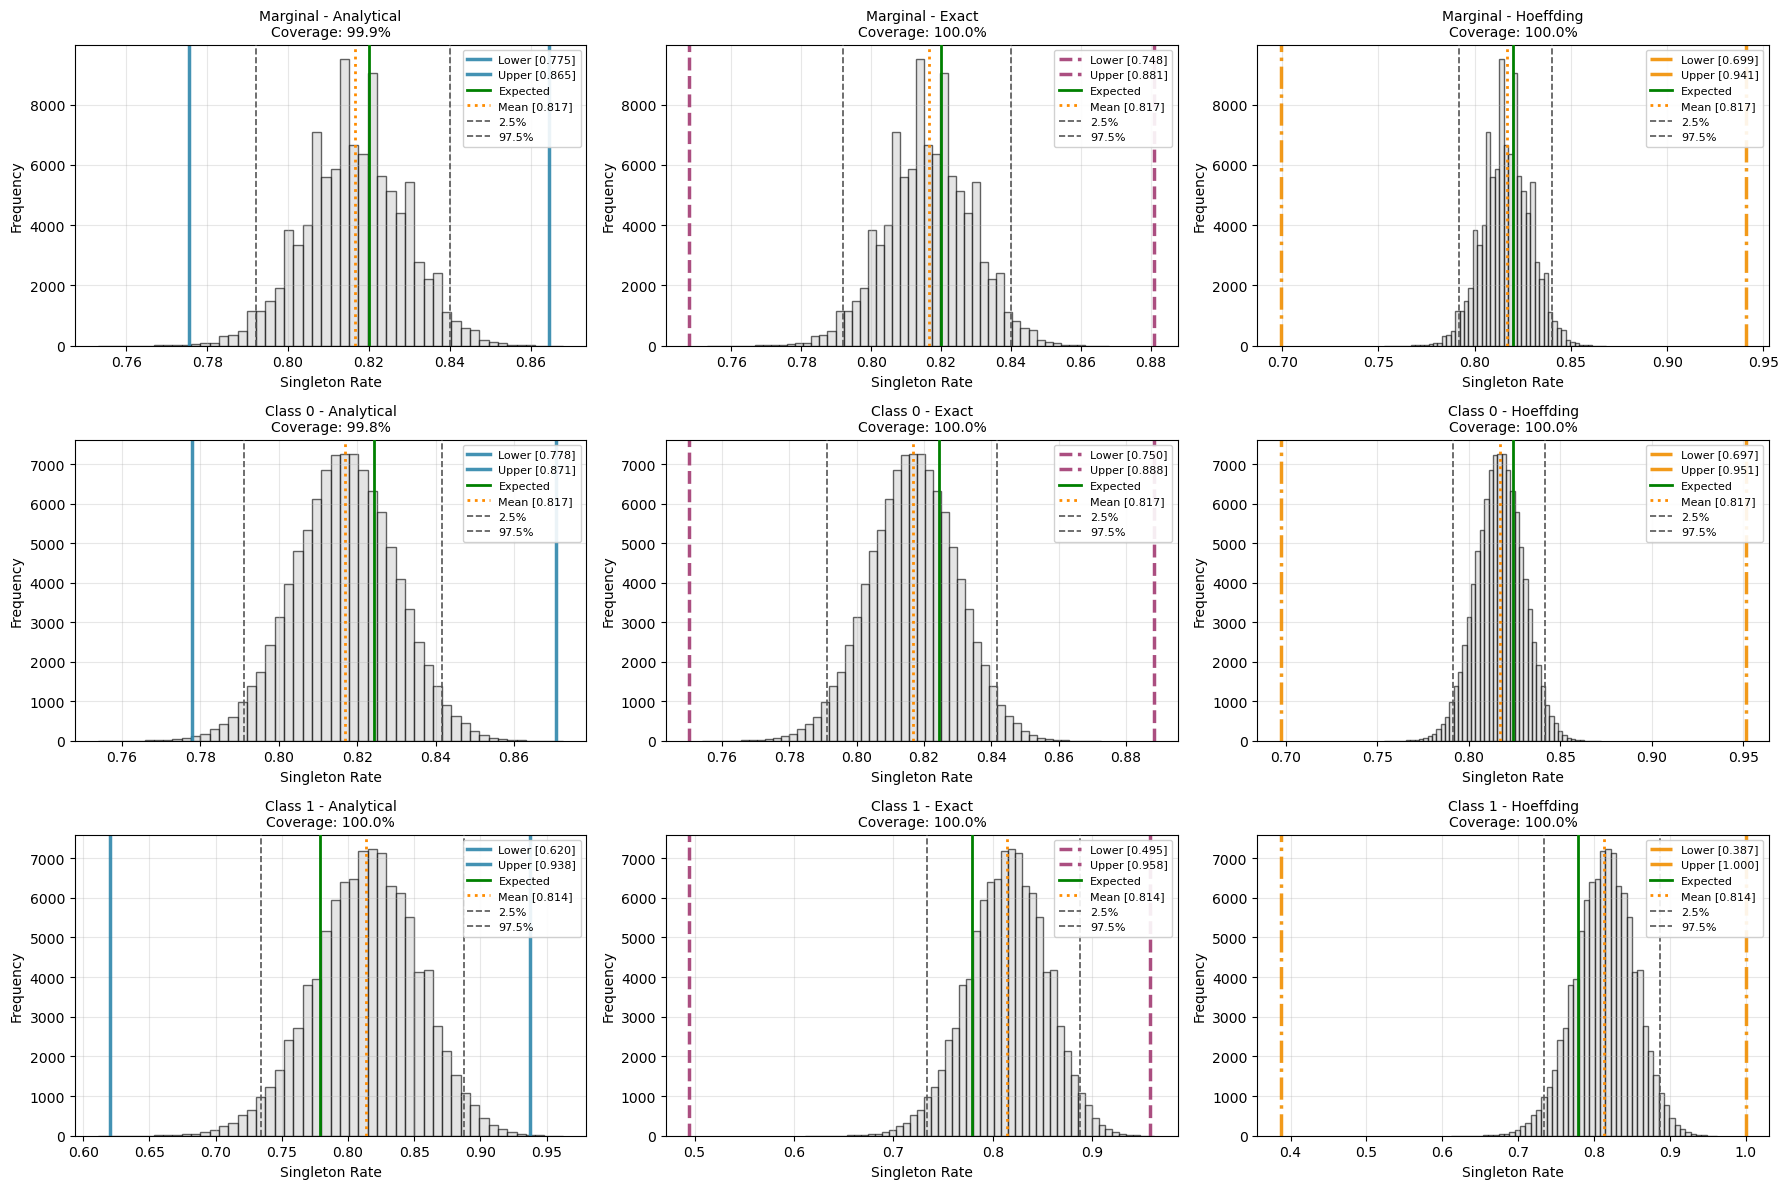

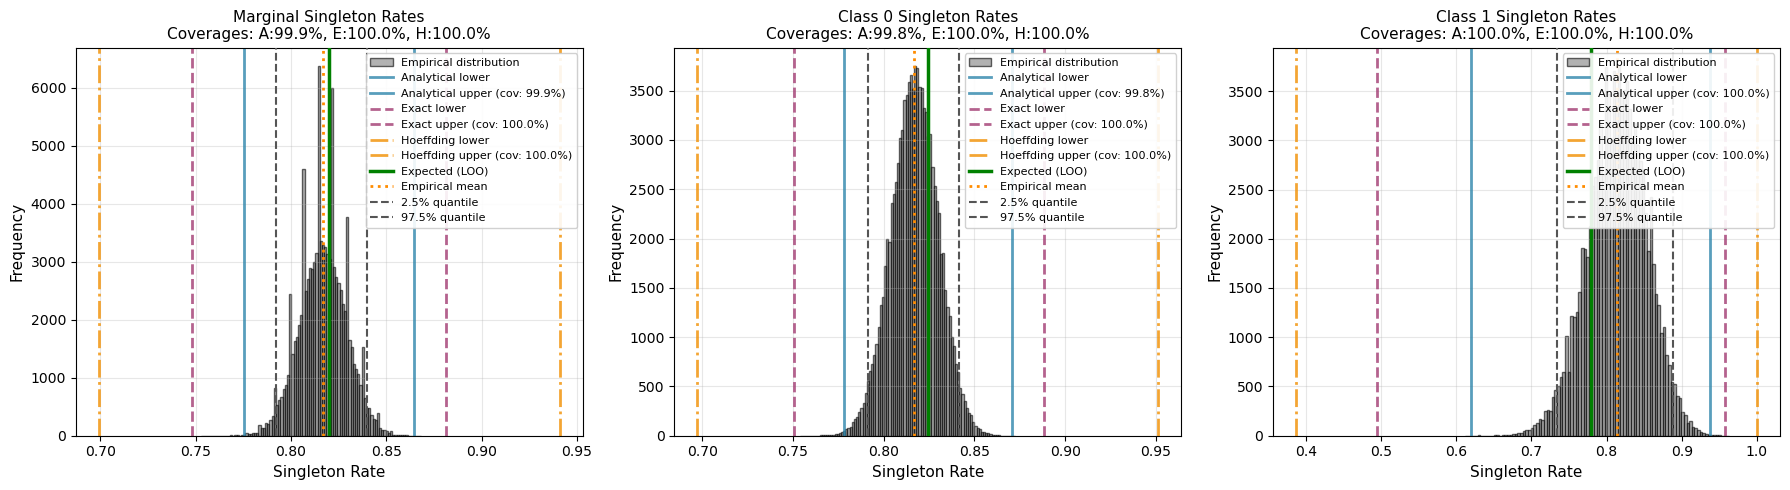

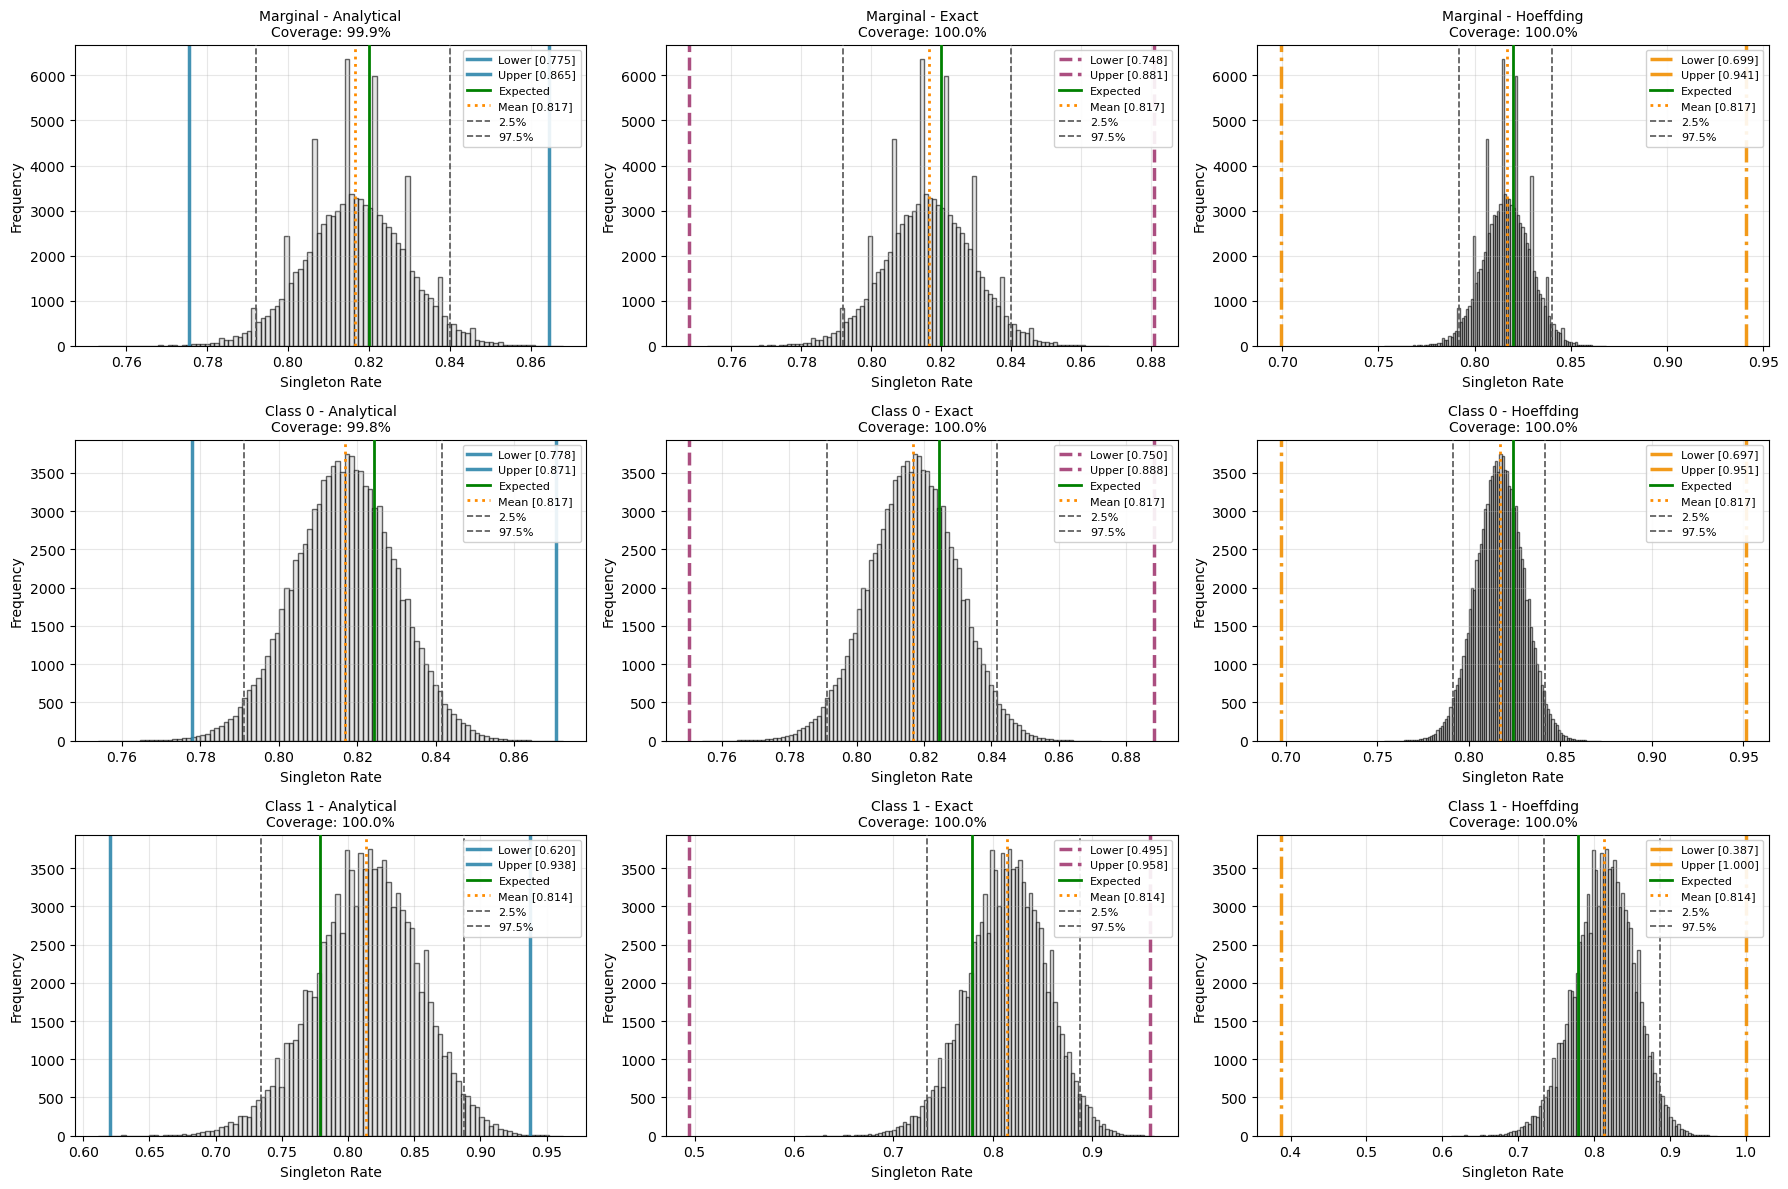

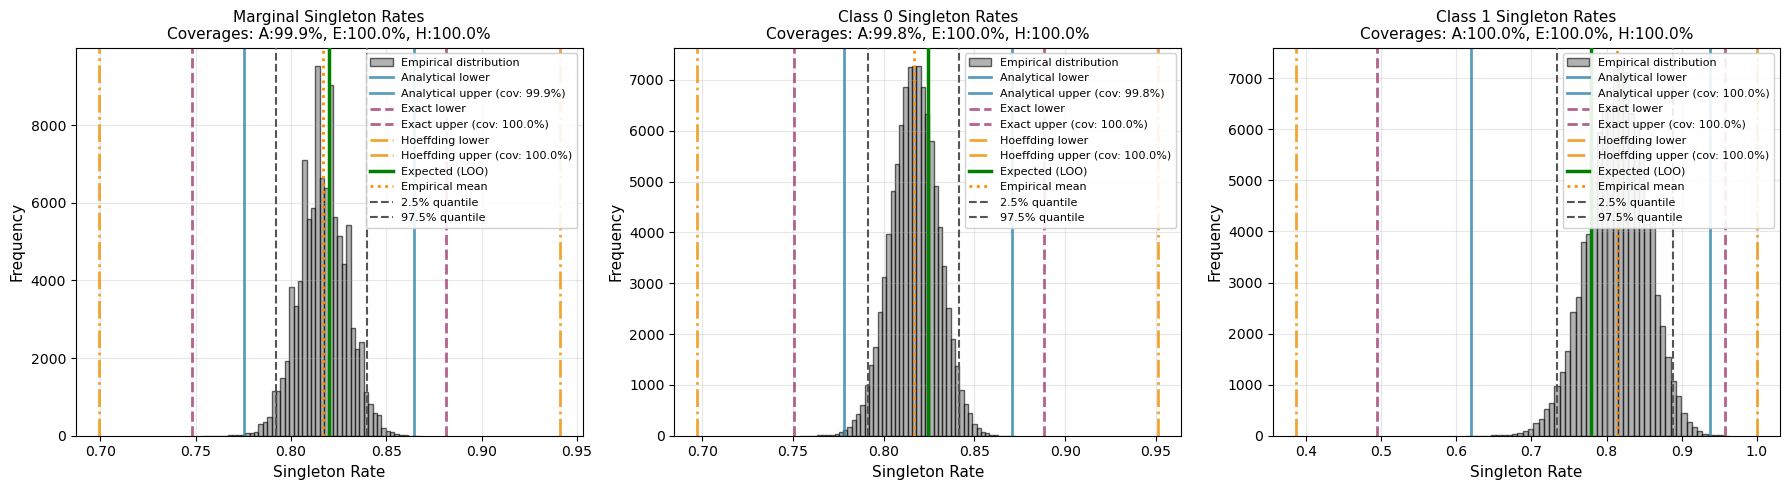

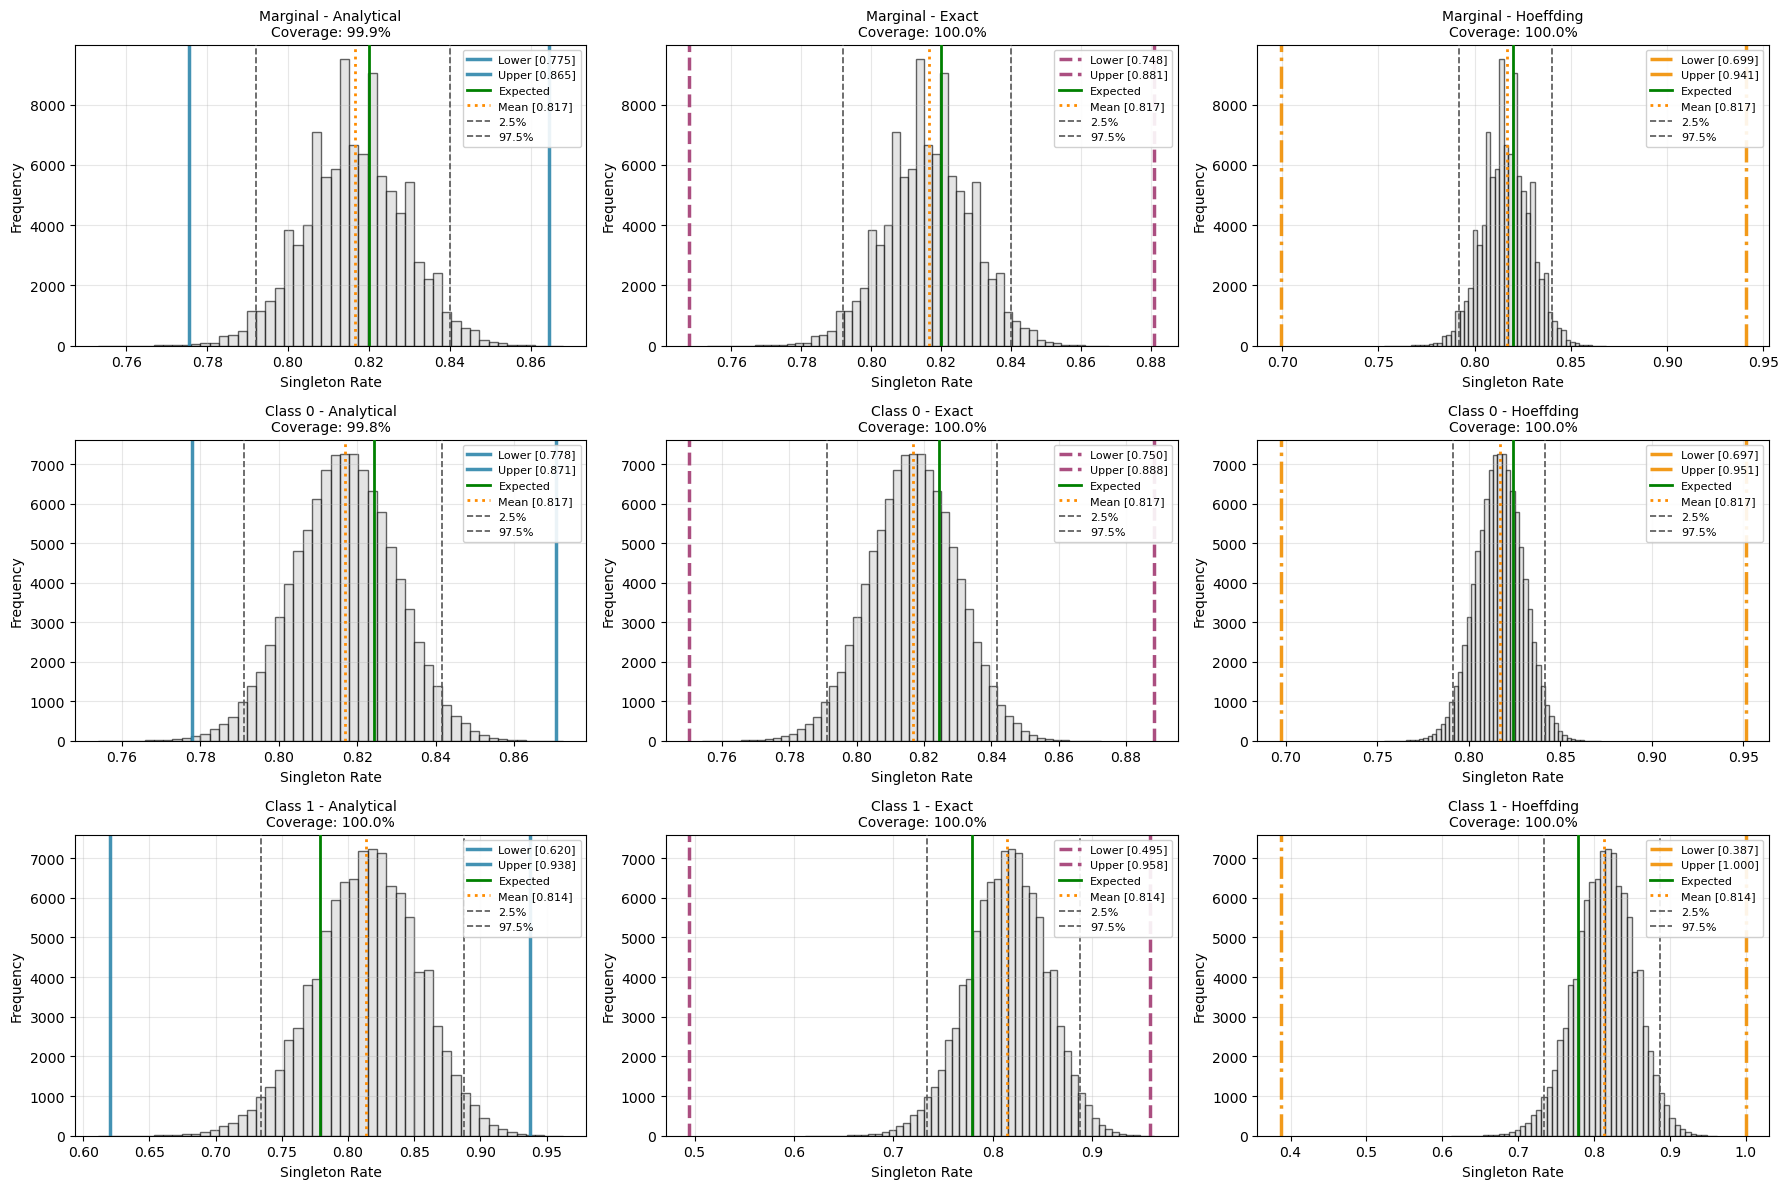

In [64]:
validation = ssbc.validate_pac_bounds(
    report=report,
    simulator=sim,
    test_size=N_samples,      # Size of each test set
    n_trials=100000,       # Number of independent trials (increase for better stats)
    seed=42,             # For reproducibility
    verbose=True,
    n_jobs=-1,           # Use all CPU cores
)

ssbc.print_validation_results(validation)


from ssbc import plot_validation_bounds

# Simple usage
plot_validation_bounds(validation, metric="singleton")

# Customize
plot_validation_bounds(
    validation, 
    metric="singleton", 
    show_detail=True,
    bins=100,
    return_figs=False
)

# Or get figures for saving/customization
fig_main, fig_detail = plot_validation_bounds(
    validation, 
    metric="singleton", 
    return_figs=True
)


In [71]:
results = ssbc.validate_prediction_interval_calibration(
    simulator=sim,
    n_calibration=N_samples,        # Size of each calibration dataset
    BigN=500,                  # Number of different calibrations to test
    n_trials=1000,             # Test sets per calibration
    test_size=N_samples,
    ci_level=0.95,
    prediction_method="all",  # Compare all methods
    use_loo_correction=True,
    loo_inflation_factor=4.0,
    verbose=False,            # Minimal printouts
    n_jobs=-1,
    seed=0
)

In [66]:
# Print results
ssbc.print_calibration_validation_results(results)

PREDICTION INTERVAL CALIBRATION VALIDATION

Configuration:
  Calibrations tested: 500
  Calibration size: 1000
  Trials per calibration: 1000
  Target confidence level: 95%

MARGINAL

SINGLETON:
  Selected:
    Mean coverage: 99.98%
    Median coverage: 100.00%
    Quantiles: [5%: 100.00%, 50%: 100.00%, 95%: 100.00%]
    Fraction ≥ 95%: 100.0% ✅
    Fraction ≥ 95%: 100.0%
  Analytical:
    Mean coverage: 98.19%
    Median coverage: 99.70%
    Quantiles: [5%: 91.78%, 50%: 99.70%, 95%: 100.00%]
    Fraction ≥ 95%: 91.2% ❌
    Fraction ≥ 95%: 91.2%
  Exact:
    Mean coverage: 99.98%
    Median coverage: 100.00%
    Quantiles: [5%: 100.00%, 50%: 100.00%, 95%: 100.00%]
    Fraction ≥ 95%: 100.0% ✅
    Fraction ≥ 95%: 100.0%
  Hoeffding:
    Mean coverage: 100.00%
    Median coverage: 100.00%
    Quantiles: [5%: 100.00%, 50%: 100.00%, 95%: 100.00%]
    Fraction ≥ 95%: 100.0% ✅
    Fraction ≥ 95%: 100.0%

DOUBLET:
  Selected:
    Mean coverage: 99.98%
    Median coverage: 100.00%
    Quantile

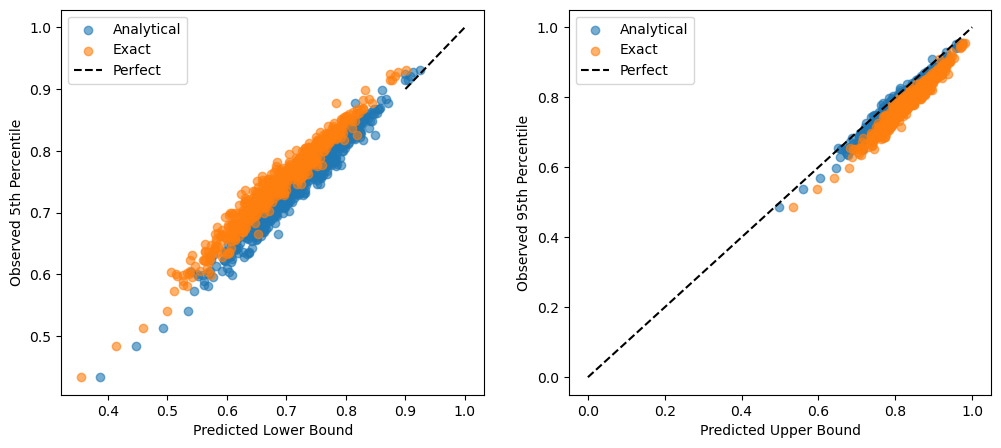

In [69]:
from ssbc import validate_prediction_interval_calibration, get_calibration_bounds_dataframe

# Run meta-validation


# Extract DataFrame
df = get_calibration_bounds_dataframe(results)

# Filter specific datasets
df_single = df[(df['scope'] == 'class_0') & (df['metric'] == 'singleton')]

# Plot lower bounds comparison
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Lower quantiles
ax1.scatter(df_single['analytical_lower'], df_single['observed_q05'], label='Analytical', alpha=0.6)
ax1.scatter(df_single['exact_lower'], df_single['observed_q05'], label='Exact', alpha=0.6)
ax1.plot([0.90, 1], [0.90, 1], 'k--', label='Perfect')
ax1.set_xlabel('Predicted Lower Bound')
ax1.set_ylabel('Observed 5th Percentile')
ax1.legend()

# Upper quantiles  
ax2.scatter(df_single['analytical_upper'], df_single['observed_q95'], label='Analytical', alpha=0.6)
ax2.scatter(df_single['exact_upper'], df_single['observed_q95'], label='Exact', alpha=0.6)
ax2.plot([0.0, 1], [0.00, 1], 'k--', label='Perfect')
ax2.set_xlabel('Predicted Upper Bound')
ax2.set_ylabel('Observed 95th Percentile')

ax2.legend()

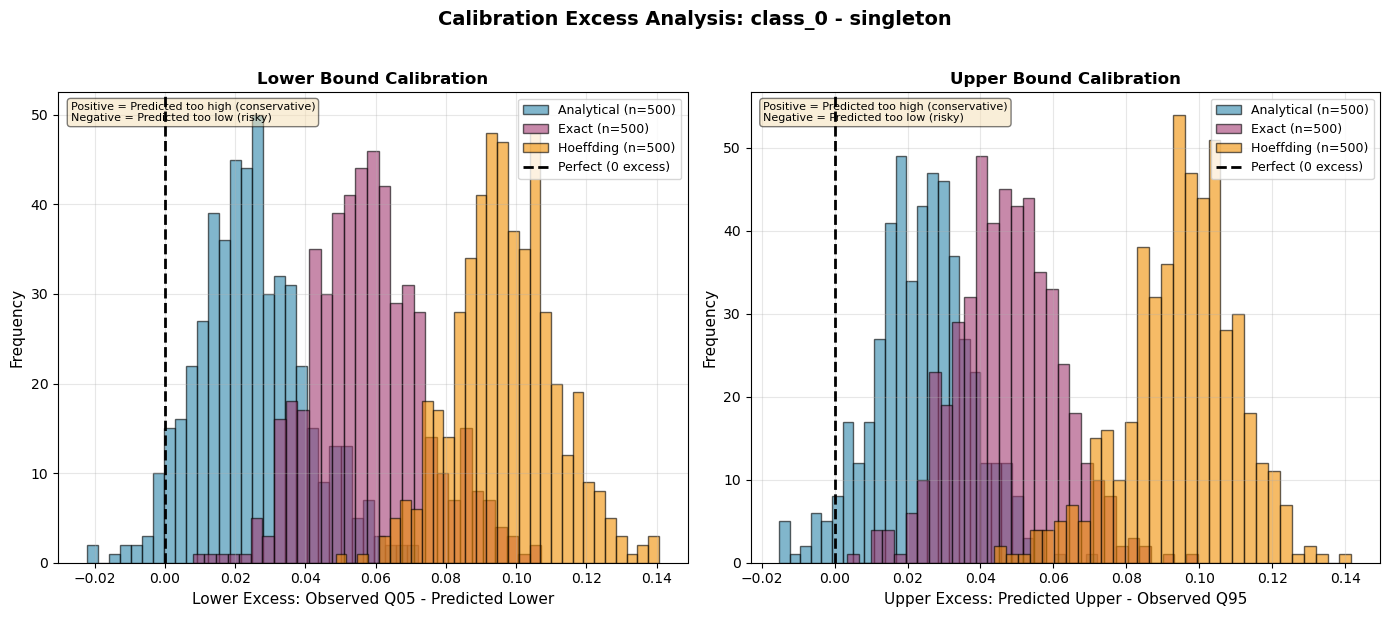

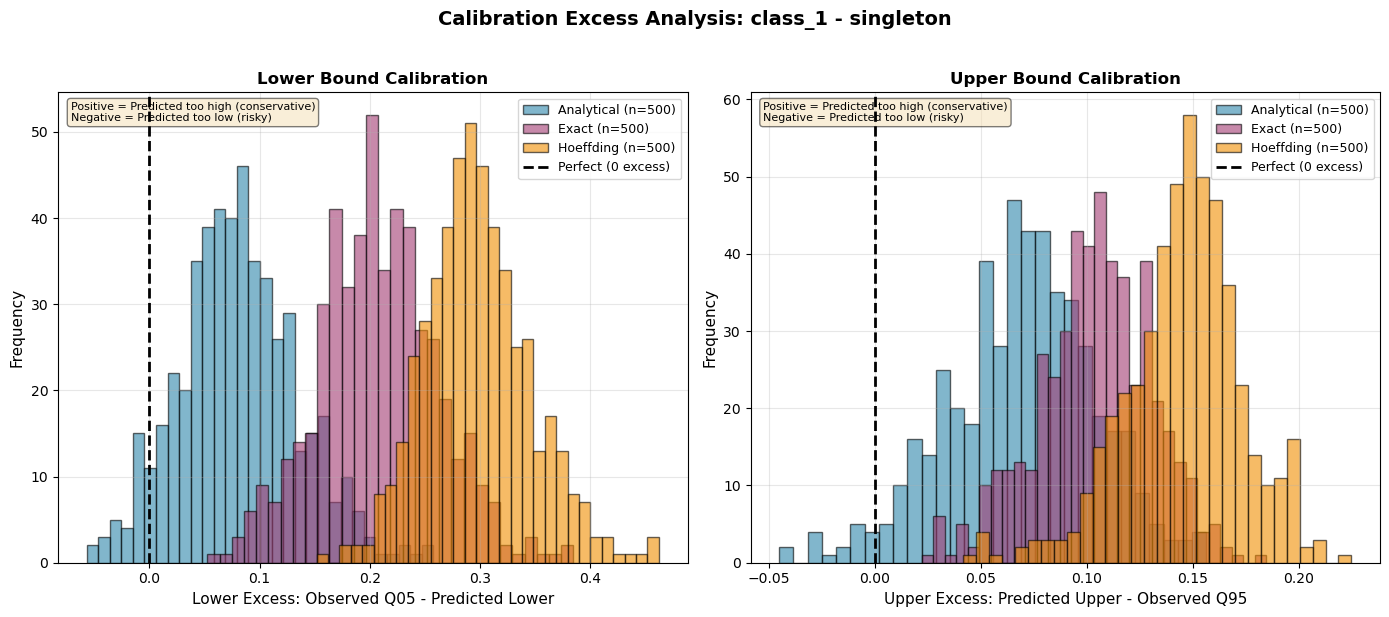

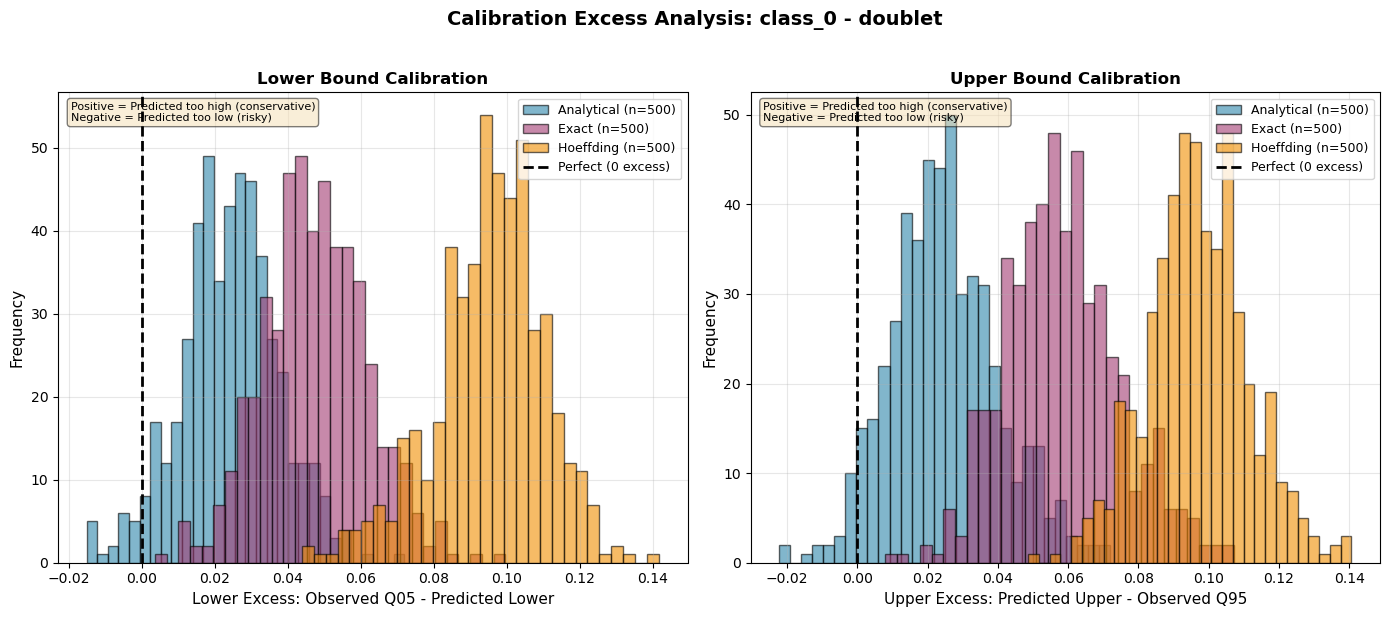

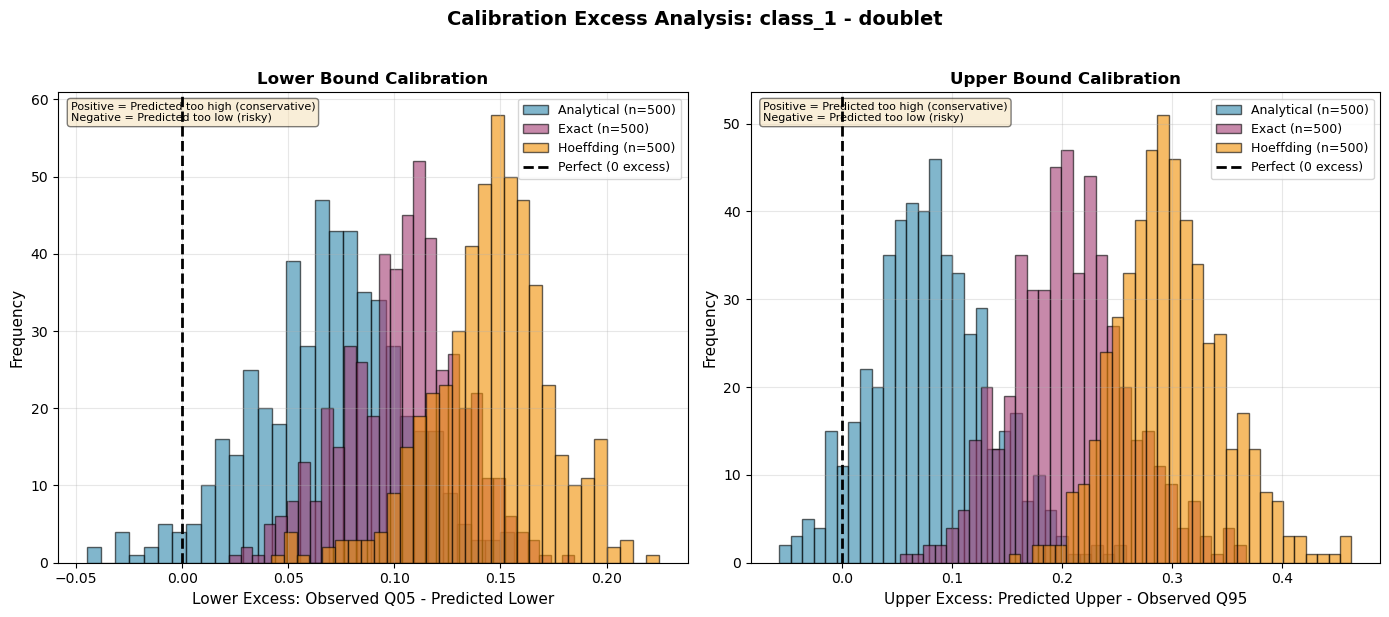

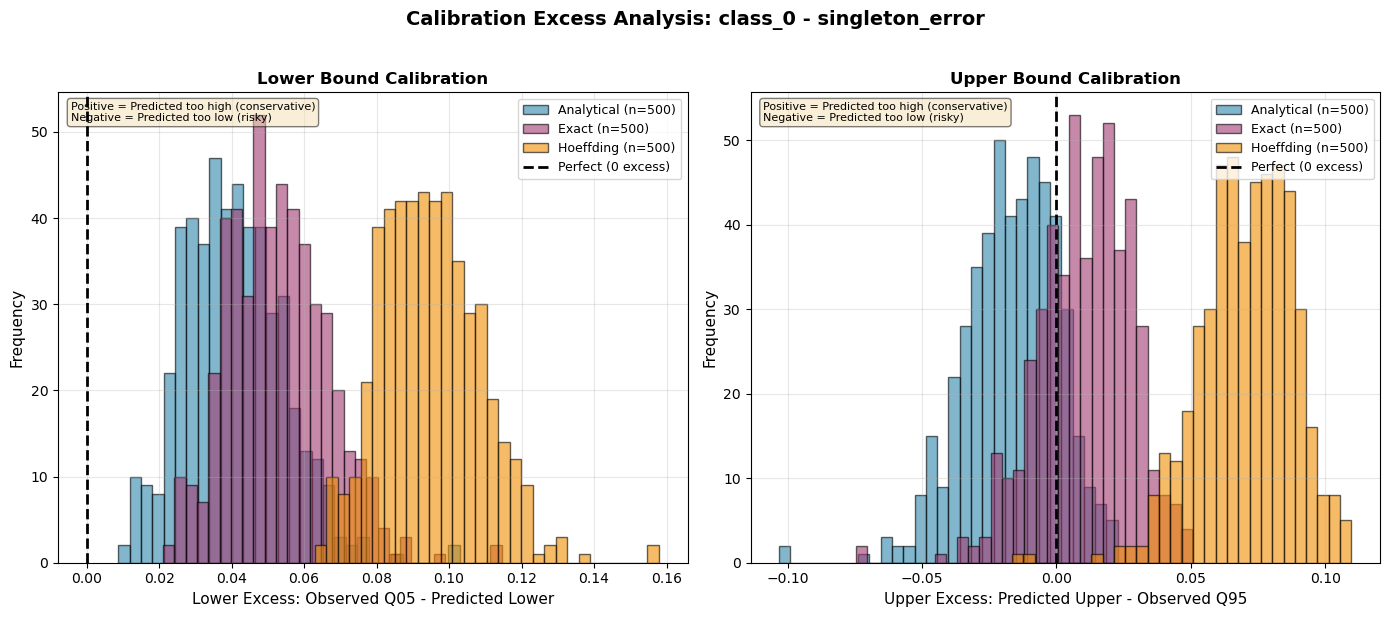

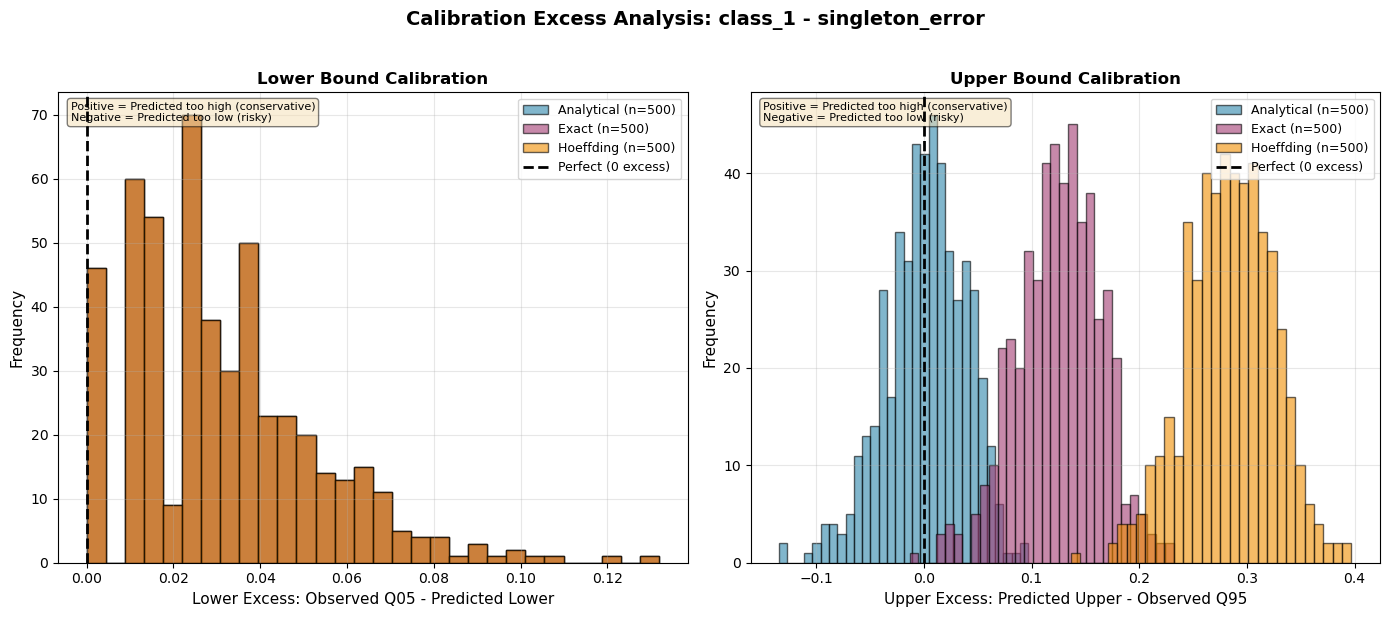

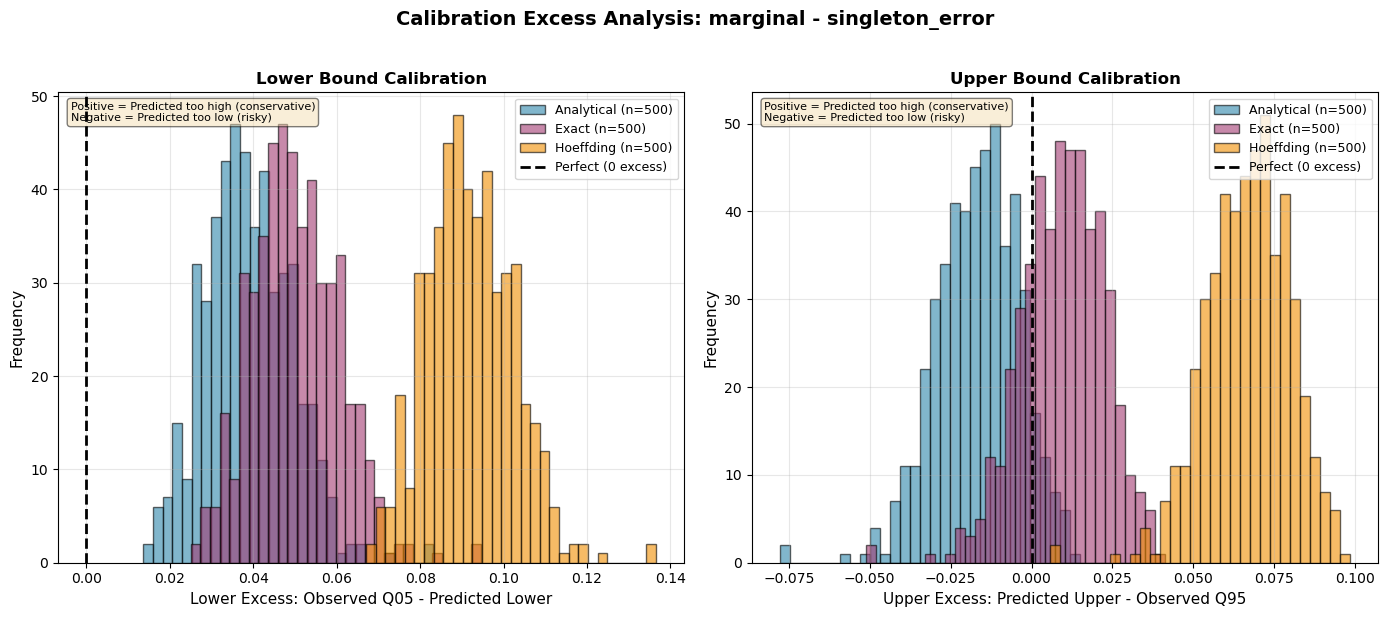

In [73]:
from ssbc import (
    validate_prediction_interval_calibration,
    get_calibration_bounds_dataframe,
    plot_calibration_excess,
)
# Plot excess for singleton marginal
df_0_single = df[(df['scope'] == 'class_0') & (df['metric'] == 'singleton')]
plot_calibration_excess(df_0_single, scope='class_0', metric='singleton')

df_1_single = df[(df['scope'] == 'class_1') & (df['metric'] == 'singleton')]
plot_calibration_excess(df_1_single, scope='class_1', metric='singleton')

# Plot excess for singleton marginal
df_0_doublet = df[(df['scope'] == 'class_0') & (df['metric'] == 'doublet')]
plot_calibration_excess(df_0_doublet, scope='class_0', metric='doublet')

df_1_doublet = df[(df['scope'] == 'class_1') & (df['metric'] == 'doublet')]
plot_calibration_excess(df_1_doublet, scope='class_1', metric='doublet')

df_0_single_e = df[(df['scope'] == 'class_0') & (df['metric'] == 'singleton_error')]
plot_calibration_excess(df_0_single_e, scope='class_0', metric='singleton_error')

df_1_single_e = df[(df['scope'] == 'class_1') & (df['metric'] == 'singleton_error')]
plot_calibration_excess(df_1_single_e, scope='class_1', metric='singleton_error')

df_m_single_e = df[(df['scope'] == 'marginal') & (df['metric'] == 'singleton_error')]
plot_calibration_excess(df_m_single_e, scope='marginal', metric='singleton_error')



In [72]:
print(df)

      calibration_idx     scope           metric  observed_q05  observed_q95  \
0                   0  marginal        singleton      0.788950      0.828000   
1                   0  marginal          doublet      0.172000      0.211050   
2                   0  marginal       abstention      0.000000      0.000000   
3                   0  marginal  singleton_error      0.108827      0.146672   
4                   0   class_0        singleton      0.784463      0.827394   
...               ...       ...              ...           ...           ...   
5995              499   class_0  singleton_error      0.075589      0.114910   
5996              499   class_1        singleton      0.650572      0.795699   
5997              499   class_1          doublet      0.204301      0.349428   
5998              499   class_1       abstention      0.000000      0.000000   
5999              499   class_1  singleton_error      0.014286      0.115385   

      selected_lower  selected_upper  a